### Assignment 2: Predict water temperature using scikit-learn regression (gradient descent)
#### Natalie Kim
Working with the same data set from last week's homework assignment. Goal will be to compare the performance of the normal equation to linear regression with gradeitn descent. 

Also will be scaling data to speed-up the process of mini-batch gradient descent.

In [1]:
import pandas as pd

#### Part A: Data Cleaning

##### 1. Increase the complexity of model slightly by increasing the number of features. Keep the following features:
- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (mililiters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [2]:
data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/bottle.csv',
                  low_memory=False)

In [3]:
# Subset data
data2 = data[['T_degC', 'Salnty', 'STheta','O2ml_L','Depthm']]

In [4]:
data2.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


##### 2. Remove NaN / NA values from dataset (prior to building train/test sets) same as HW 1
- Shape of data should be: (661268, 5)

In [5]:
# Remove NaN and NA
data_clean = data2.dropna()

In [6]:
# confirm shape of data
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661268 entries, 2160 to 864862
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  661268 non-null  float64
 1   Salnty  661268 non-null  float64
 2   STheta  661268 non-null  float64
 3   O2ml_L  661268 non-null  float64
 4   Depthm  661268 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 30.3 MB


##### 3. Remove any STheta outliers (same as HW1)
- Shape of your data should be: (661268, 5)
- Note: outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own

In [7]:
import matplotlib.pyplot as plt

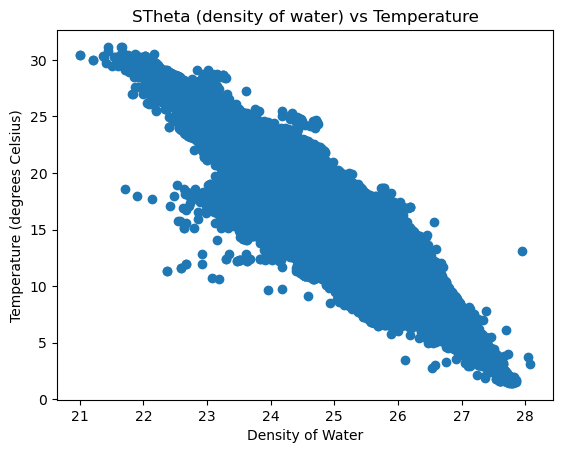

In [8]:
# create plot
plt.scatter(data_clean['STheta'], data_clean['T_degC'])

# add titles and labels
plt.title('STheta (density of water) vs Temperature')
plt.xlabel('Density of Water')
plt.ylabel('Temperature (degrees Celsius)')

# display the plot
plt.show()

Scatter plot confirms removal of outliers. No need to adjust table. Size is the same.

#### Part B: Train/Test Split & Scaling

##### 1. Create X & y objects:
- X object should be all 4 predictors. Shape should be: (661268, 4)
- y object should be just your target variable (T_degC). Shape should be  (661268, 1)
    - Hint: you need to specify the shape you want. Try converting y to a numpy array, and then using the .reshape() method

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
# X and y matrices
X = data_clean[['Salnty', 'STheta','O2ml_L','Depthm']]
y = np.array(data_clean[['T_degC']]).reshape(661268, 1)

##### 2. Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [11]:
# split the data 80:20 for train to test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### 3. Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.
- Use "StandardScaler"
- You should create two new X objects:
    - X_train_scaled
    - X_test_scaled
Note: X_test_scaled must use the scaling parameters learned from the training data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
# scaled data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Part C: Linear Regression with sklearn

##### 1. Create instance of LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train

In [15]:
from sklearn import linear_model

In [16]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

##### 2. Print out the coefficients (including the intercept)

In [17]:
coeff_names = ['Intercept','Salnty','STheta','O2ml_L','Depthm']

coeff = {
    'Linear Regression': [lin_reg.intercept_[0],lin_reg.coef_[0,0],
                         lin_reg.coef_[0,1],lin_reg.coef_[0,2],
                         lin_reg.coef_[0,3]]
}

coeff = pd.DataFrame(coeff)
coeff.index = coeff_names

coeff

,Linear Regression
Intercept,10.915418
Salnty,1.630466
STheta,-4.634591
O2ml_L,0.302068
Depthm,-0.474955


##### 3. Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled
- Call predictions y_pred_sklearn

In [18]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

##### 4. Calculate the following for the test data:
- mean squared error
- r-squared
- explained varaince

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [35]:
metric_names = ["Mean Squared Error", "R-Squared", "Explained Variance"]

metrics = {
    'Linear Regression': [mean_squared_error(y_test, y_pred_sklearn),
                        r2_score(y_test,y_pred_sklearn),
                        explained_variance_score(y_test, y_pred_sklearn)]
}

metrics = pd.DataFrame(metrics)
metrics.index = metric_names

metrics

,Linear Regression
Mean Squared Error,0.111011
R-Squared,0.993768
Explained Variance,0.993768


##### 5. Create a scatterplot that shows actual versus predicted values for the T_degC

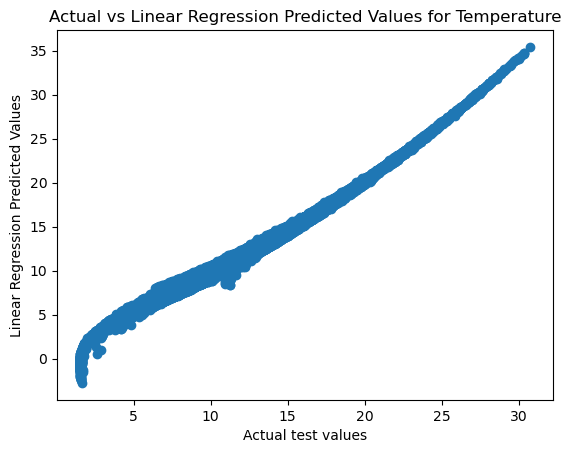

In [21]:
# create plot
plt.scatter(y_test, y_pred_sklearn)

# title & labels
plt.title('Actual vs Linear Regression Predicted Values for Temperature')
plt.xlabel('Actual test values')
plt.ylabel('Linear Regression Predicted Values')

# show plot
plt.show()

#### Part D. Gradient Descent Mini-Batch - Size: 50

##### 1. Similar to HW1, need to add a column of 1s to X_train_scaled and X_test_scaled

In [22]:
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]

##### 2. Use MSE as the cost function for the Gradient Descent
- refer to Equation 4-3 in HOML Ch.4
- note: HOML Github does including a changing eta through using the learning_schedule function. DO NOT use a changing eta for this assignment

In [23]:
# MSE as cost function
def cost_fun(m,X,theta,y):
    return 2/m * X.T.dot(X.dot(theta) - yi)

##### 3. Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work

In [24]:
eta = 0.1
epochs = 100

theta_path_mgd = []
m = len(X_train_scaled_b)
minibatch_size = 50

np.random.seed(42)
theta = np.random.randn(5,1) # random initialization

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = cost_fun(minibatch_size,xi,theta,yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

##### 4. Calculate the following for test data:
- mean squared error
- r-squared
- explained variance

In [29]:
y_pred_gd50 = X_test_scaled_b.dot(theta)

In [36]:
metrics['GD_50'] = [mean_squared_error(y_test, y_pred_gd50),
                         r2_score(y_test,y_pred_gd50),
                         explained_variance_score(y_test, y_pred_gd50)]

metrics

,Linear Regression,GD_50
Mean Squared Error,0.111011,0.118491
R-Squared,0.993768,0.993348
Explained Variance,0.993768,0.993403


##### 5. Create scatterplot that shows actual versus predicted values for the T_degC for the test data

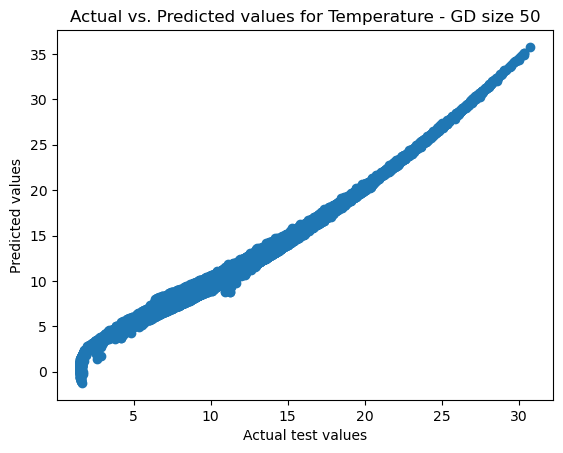

In [31]:
# create plot
plt.scatter(y_test, y_pred_gd50)

# title & labels
plt.title('Actual vs. Predicted values for Temperature - GD size 50')
plt.xlabel('Actual test values')
plt.ylabel('Predicted values')

# show plot
plt.show()

##### 6. Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data:
- mean squared error
- r-squared
- explained variance

In [32]:
y_pred_gd50_train = X_train_scaled_b.dot(theta)

In [37]:
metrics['GD_50 Train'] = [mean_squared_error(y_train, y_pred_gd50_train),
                         r2_score(y_train,y_pred_gd50_train),
                         explained_variance_score(y_train, y_pred_gd50_train)]

metrics

,Linear Regression,GD_50,GD_50 Train
Mean Squared Error,0.111011,0.118491,0.118167
R-Squared,0.993768,0.993348,0.993382
Explained Variance,0.993768,0.993403,0.993442


#### Part D. Gradient Descent Mini-Batch - Size: 250

##### 0.1 eta and 100 epochs

In [38]:
minibatch_size = 250

np.random.seed(42)
theta = np.random.randn(5,1) # random initialization

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = cost_fun(minibatch_size,xi,theta,yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

##### 4. Calculate the following for test data:
- mean squared error
- r-squared
- explained variance

In [40]:
y_pred_gd250 = X_test_scaled_b.dot(theta)

In [41]:
metrics['GD_250'] = [mean_squared_error(y_test, y_pred_gd250),
                         r2_score(y_test,y_pred_gd250),
                         explained_variance_score(y_test, y_pred_gd250)]

metrics

,Linear Regression,GD_50,GD_50 Train,GD_250
Mean Squared Error,0.111011,0.118491,0.118167,0.112582
R-Squared,0.993768,0.993348,0.993382,0.993680
Explained Variance,0.993768,0.993403,0.993442,0.993690


##### 5. Create scatterplot that shows actual versus predicted values for the T_degC for the test data

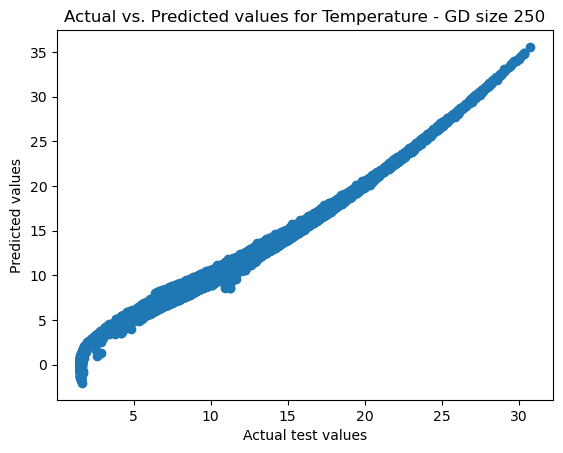

In [42]:
# create plot
plt.scatter(y_test, y_pred_gd250)

# title & labels
plt.title('Actual vs. Predicted values for Temperature - GD size 250')
plt.xlabel('Actual test values')
plt.ylabel('Predicted values')

# show plot
plt.show()

##### 6. Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data:
- mean squared error
- r-squared
- explained variance

In [43]:
y_pred_gd250_train = X_train_scaled_b.dot(theta)

In [44]:
metrics['GD_250 Train'] = [mean_squared_error(y_train, y_pred_gd250_train),
                         r2_score(y_train,y_pred_gd250_train),
                         explained_variance_score(y_train, y_pred_gd250_train)]

metrics

,Linear Regression,GD_50,GD_50 Train,GD_250,GD_250 Train
Mean Squared Error,0.111011,0.118491,0.118167,0.112582,0.112233
R-Squared,0.993768,0.993348,0.993382,0.993680,0.993714
Explained Variance,0.993768,0.993403,0.993442,0.993690,0.993727


#### Part D. Gradient Descent Mini-Batch - Size: 2000

##### 0.1 eta and 100 epochs

In [45]:
minibatch_size = 2000

np.random.seed(42)
theta = np.random.randn(5,1) # random initialization

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = cost_fun(minibatch_size,xi,theta,yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

##### 4. Calculate the following for test data:
- mean squared error
- r-squared
- explained variance

In [46]:
y_pred_gd2000 = X_test_scaled_b.dot(theta)

In [47]:
metrics['GD_2000'] = [mean_squared_error(y_test, y_pred_gd2000),
                         r2_score(y_test,y_pred_gd2000),
                         explained_variance_score(y_test, y_pred_gd2000)]

metrics

,Linear Regression,GD_50,GD_50 Train,GD_250,GD_250 Train,GD_2000
Mean Squared Error,0.111011,0.118491,0.118167,0.112582,0.112233,0.111082
R-Squared,0.993768,0.993348,0.993382,0.993680,0.993714,0.993764
Explained Variance,0.993768,0.993403,0.993442,0.993690,0.993727,0.993764


##### 5. Create scatterplot that shows actual versus predicted values for the T_degC for the test data

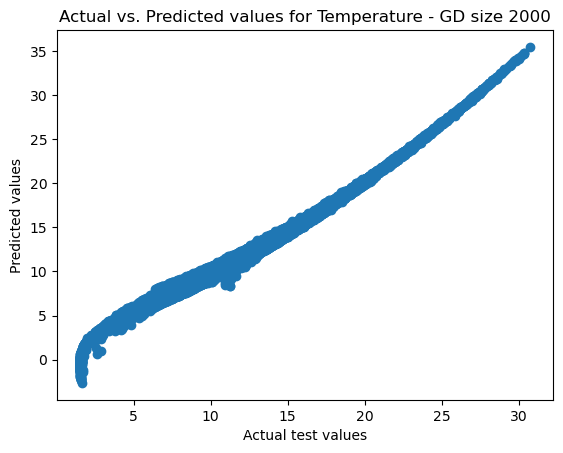

In [48]:
# create plot
plt.scatter(y_test, y_pred_gd2000)

# title & labels
plt.title('Actual vs. Predicted values for Temperature - GD size 2000')
plt.xlabel('Actual test values')
plt.ylabel('Predicted values')

# show plot
plt.show()

##### 6. Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data:
- mean squared error
- r-squared
- explained variance

In [49]:
y_pred_gd2000_train = X_train_scaled_b.dot(theta)

In [50]:
metrics['GD_2000 Train'] = [mean_squared_error(y_train, y_pred_gd2000_train),
                         r2_score(y_train,y_pred_gd2000_train),
                         explained_variance_score(y_train, y_pred_gd2000_train)]

metrics

,Linear Regression,GD_50,GD_50 Train,GD_250,GD_250 Train,GD_2000,GD_2000 Train
Mean Squared Error,0.111011,0.118491,0.118167,0.112582,0.112233,0.111082,0.110704
R-Squared,0.993768,0.993348,0.993382,0.993680,0.993714,0.993764,0.993800
Explained Variance,0.993768,0.993403,0.993442,0.993690,0.993727,0.993764,0.993800


#### Part E: Conceptual Questions

##### 1. Describe how parameter estimation in Gradient Descent differs from using the normal equation
The Normal Equation is closed-form solution to estimating the parameter: it provides a result directly through a mathematical equation. On the other hand, Gradient Descent is a generic optimization algorithm that converges to the solution through iterations as it adjusts the parameters to minimize the cost function.

##### 2. We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?
Unlike Stochastic Gradient Descent, which randomly picks a single instance from the training set to compute the gradient, Mini-Batch randomly picks a small **set** of instances to calculate the gradient. Though it may not be as fast as Stochastic, one significant advantage that Mini-Batch has is that it is not as erratic and thus can get closer to the true minimum. However, Mini-Batch may have a harder time escaping out of local minima - though since this was for Linear Regresion, we do not have to worry about this.

##### 3. Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.
The best-performing version of Gradient Descent was the Mini-Batch of size 2000. It explains 99.37% of the variance of the test data and the smallest MSE. Although the model performs extremely well on te training data with an explained variance of 99.38%, this does not necessarily indicat overfitting. This is because there is an insignificant discrepancy between the training and test R^2 of 0.01%.

##### 4. Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?
The learning rate is a hyperparameter that determines the size of the steps that Gradient Descent takes. Changing the learning rate over time, specifically reducing the learning rate gradually, can provide a solution to escaping from a local optima. Larger steps at the beginning helps make quick progress and avoiding the local minima, while the smaller steps allow the algorithm to settle at on a solution. Furthermore, it can help us avoid the pitfalls that can occur when the learning rate is too low or high. When it's too low, the algorithm may take a long time to eventually reach the solution. However if it's too high, the algorithm may overshoot the minimum and jump all over the place. 

##### 5. Why would a data scientist want to use early stopping in gradient descent?
Early stopping may help avoid overfitting the model to the training data. If the number of epochs is too large, the prediction error on the training data starts to increase again - an indication of overfitting. Implementing early stopping allows the data scientist the ability to stop training model as soon as the validation error reaches a minimum.